# Работа №2 Кашко Никиты, гр. 2371

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Добавим новый атрибут "Total cost" вычисляемый как AveragePrice * Total Volume

In [2]:
df = pd.read_csv('avocado.csv')
data = df.drop(df.columns[[0, 1, 12, 13]], axis=1)
data['TotalCost'] = data['AveragePrice'] * data['Total Volume']
data.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,TotalCost
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,85434.7046
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,74083.9230


## Посмотрим, есть ли нули, выбросы и дубли


In [3]:
print(data.isnull().sum())

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
TotalCost       0
dtype: int64


In [4]:
print('Дубликатов а датасете:', data.duplicated().sum())

Дубликатов а датасете: 0


Проверим и отбросим значения строк, где значение величины отличается от среднего более чем на 3 СКО

In [5]:
for column in data.columns:
    if column != 'type':
        mean = data[column].mean()
        std_dev = data[column].std()
    
        data = data[(data[column] >= mean - 3 * std_dev) & (data[column] <= mean + 3 * std_dev)]

## Построим графики зависимостей величин датасета друг от друга

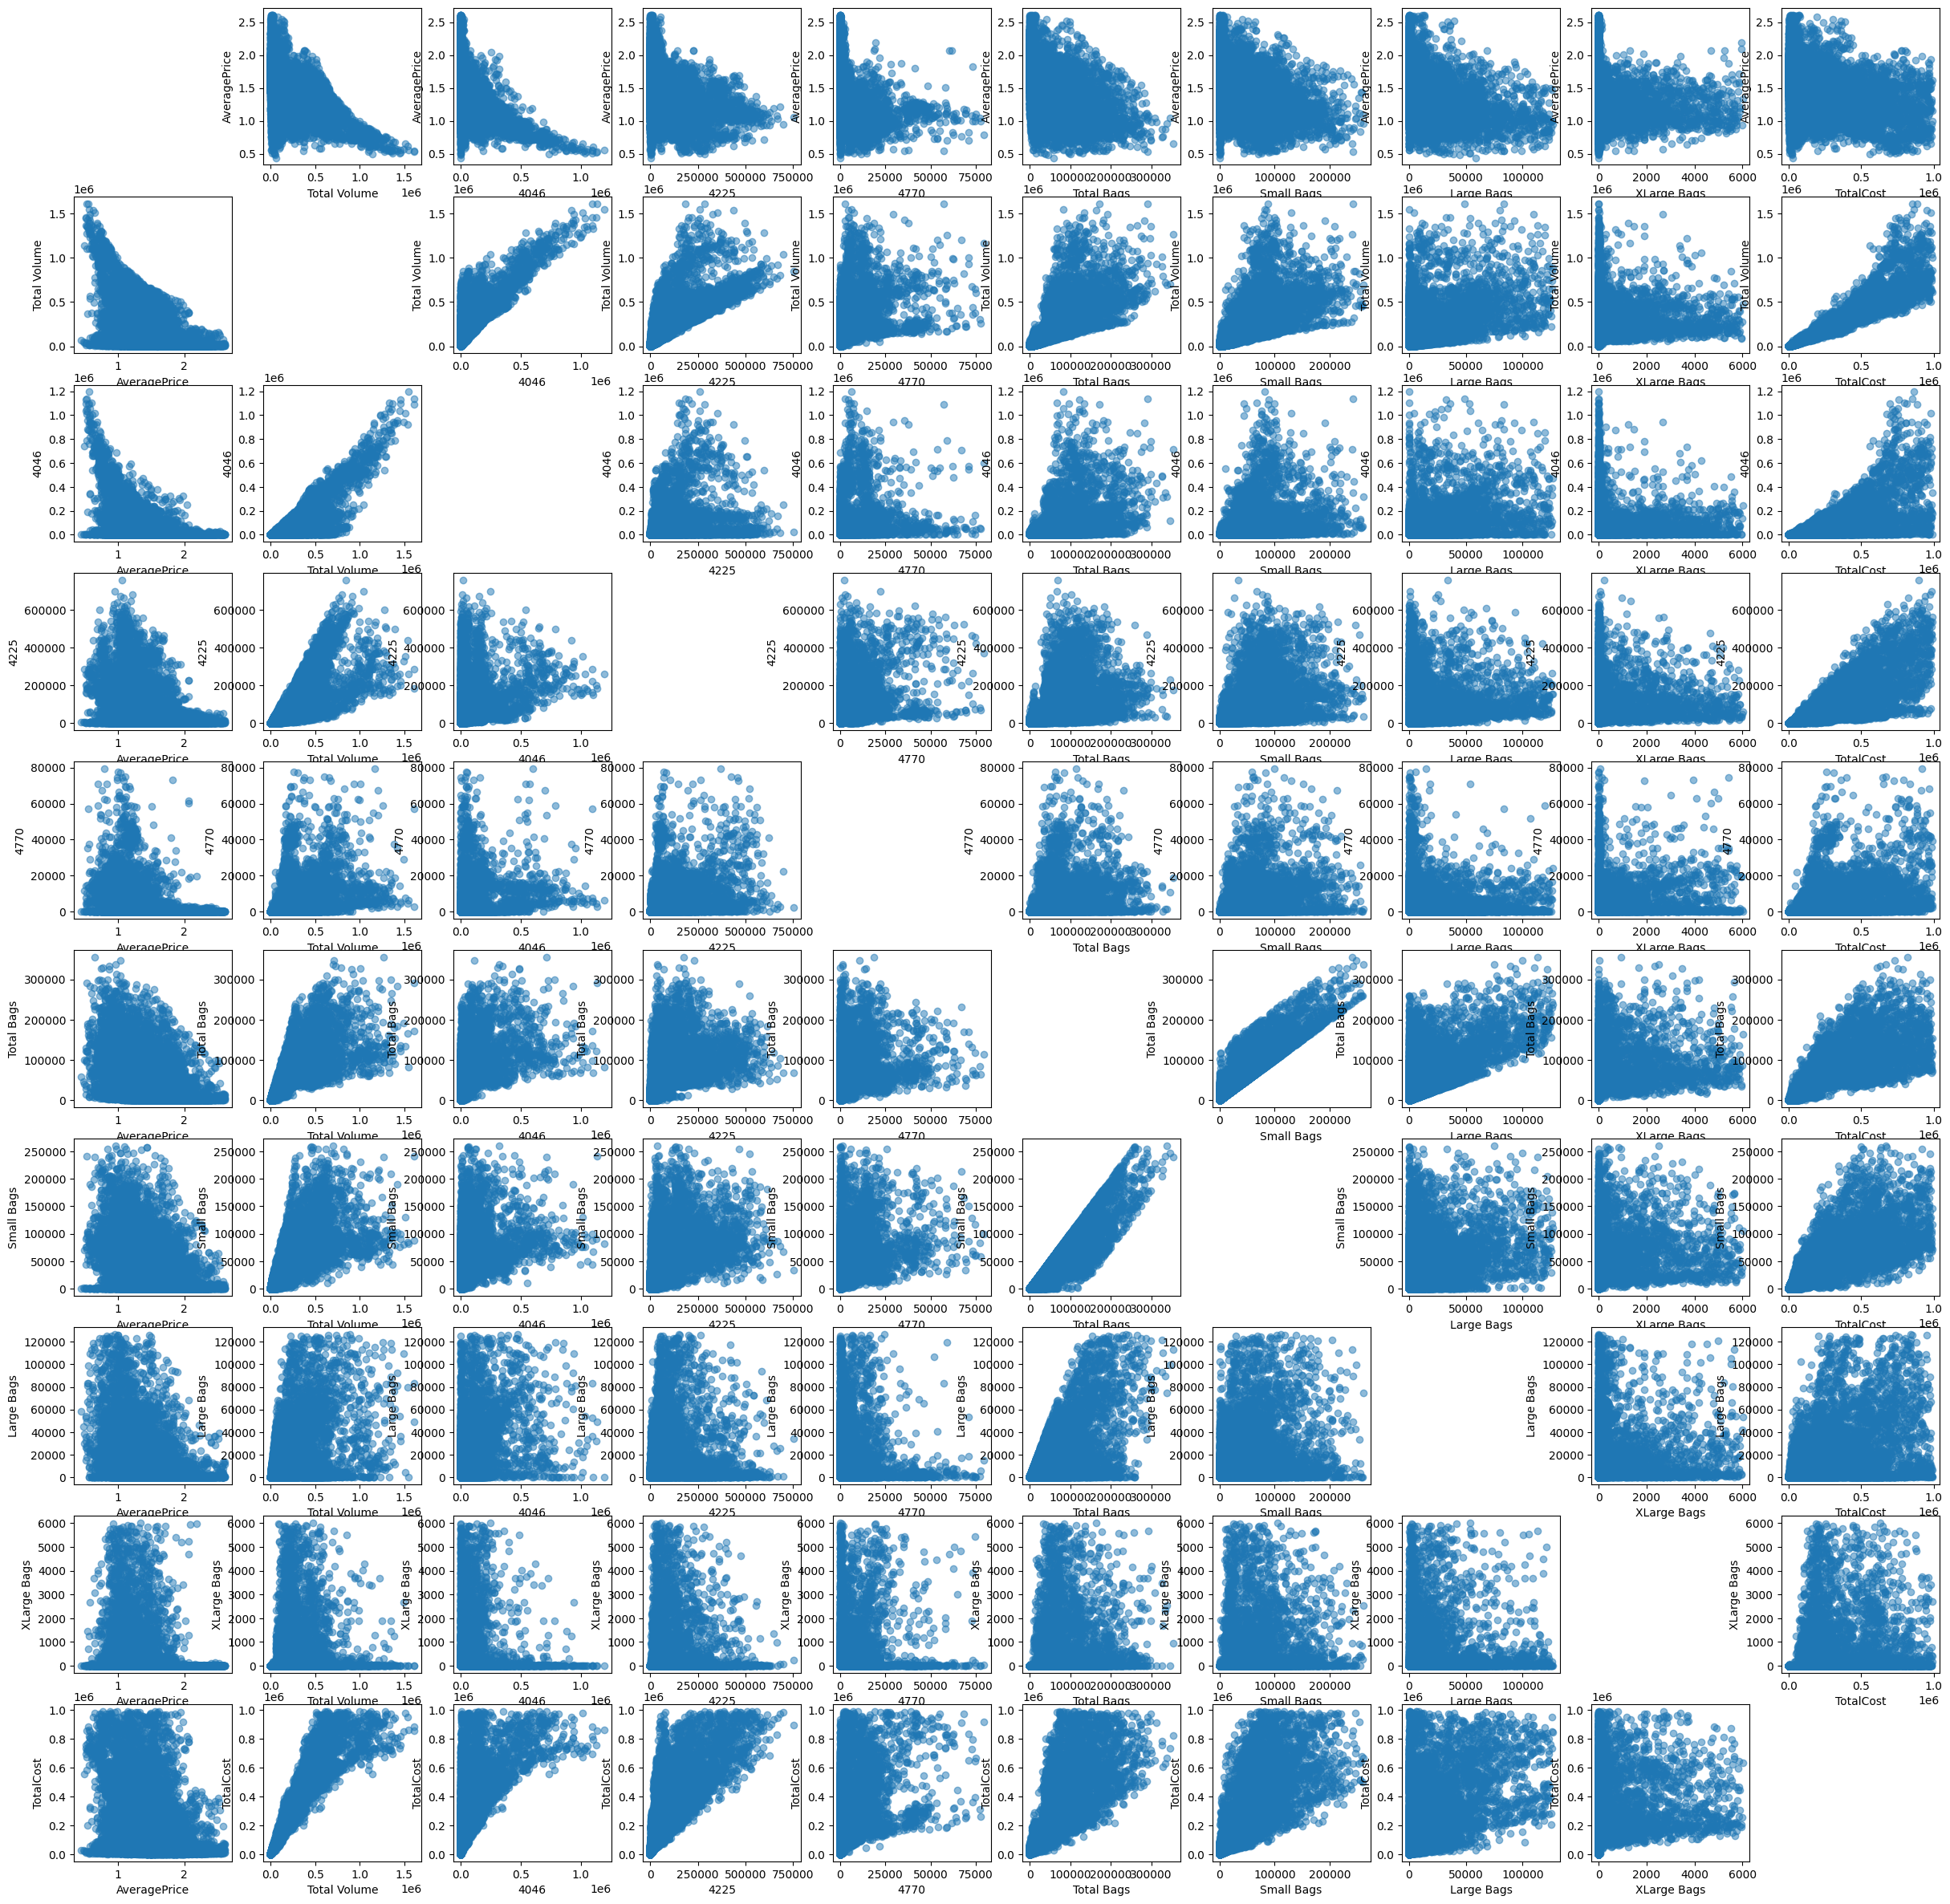

In [6]:
data_for_plots = data.drop(data.columns[[9]], axis=1)
columns = data_for_plots.columns

num_columns = len(columns)
fig, axs = plt.subplots(num_columns, num_columns, figsize=(30, 30))

for i in range(num_columns):
    for j in range(num_columns):
        if i != j:
            axs[i, j].scatter(data[columns[j]], data[columns[i]], alpha=0.5)
            axs[i, j].set_xlabel(columns[j])
            axs[i, j].set_ylabel(columns[i])
        else:
            axs[i, j].axis('off')

plt.show()

In [7]:
import seaborn as sns

In [22]:
from sklearn.cluster import KMeans

## Разобьём на два кластера данные и сравним графики по типу и кластерам

In [46]:
kmeans = KMeans(n_clusters=2, max_iter=500)
kmeans.fit(data_for_plots)

KMeans(max_iter=500, n_clusters=2)

In [47]:
data['Cluster'] = kmeans.labels_

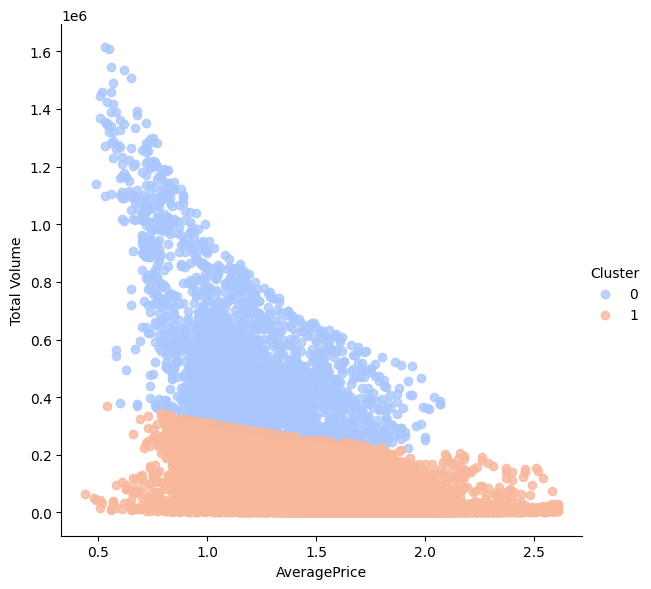

In [48]:
sns.lmplot(x='AveragePrice',y='Total Volume',data=data, hue='Cluster',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)

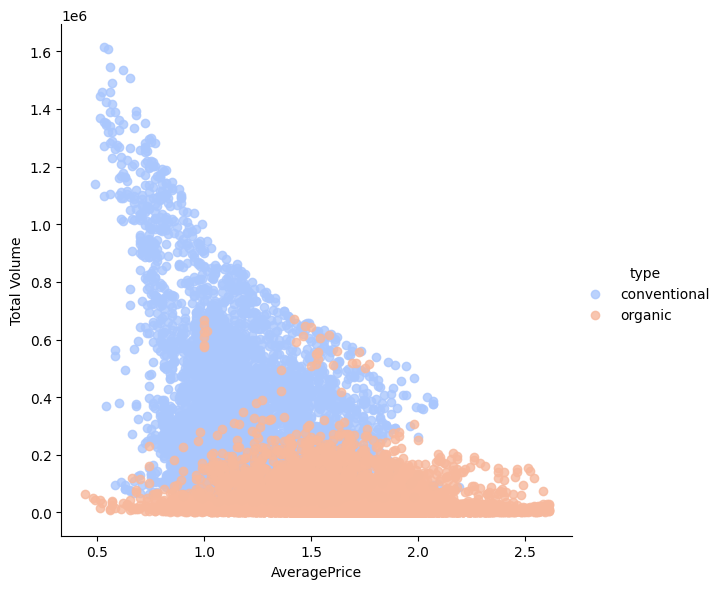

In [53]:
sns.lmplot(x='AveragePrice',y='Total Volume',data=data, hue='type',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)

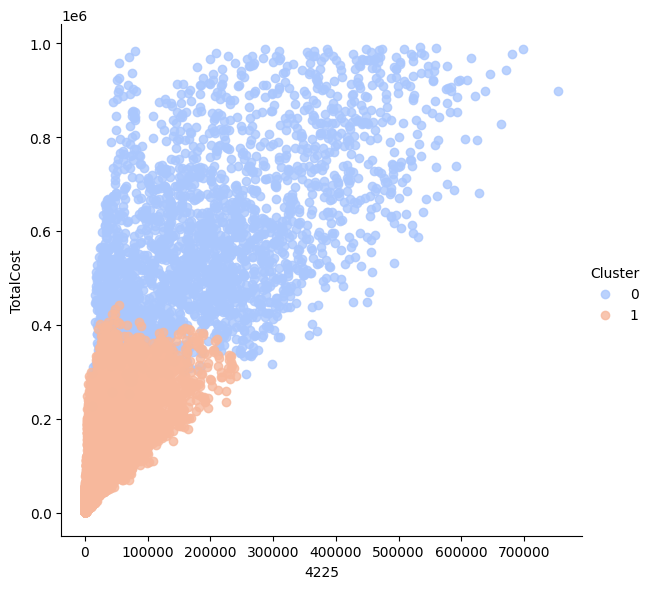

In [50]:
sns.lmplot(x='4225',y='TotalCost',data=data, hue='Cluster',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)

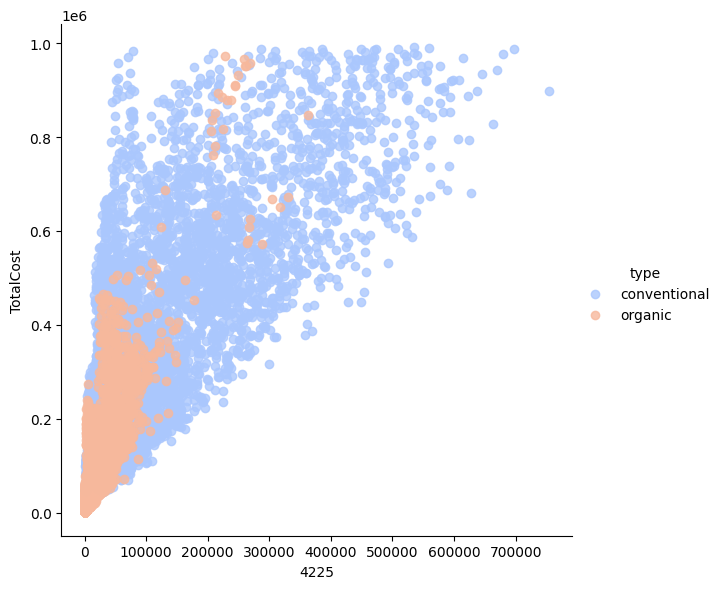

In [54]:
sns.lmplot(x='4225',y='TotalCost',data=data, hue='type',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)

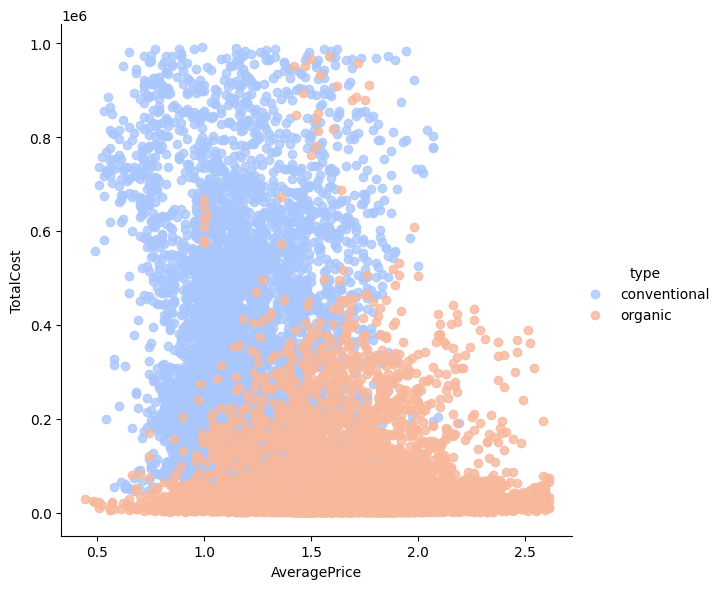

In [51]:
sns.lmplot(x='AveragePrice',y='TotalCost',data=data, hue='type',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)

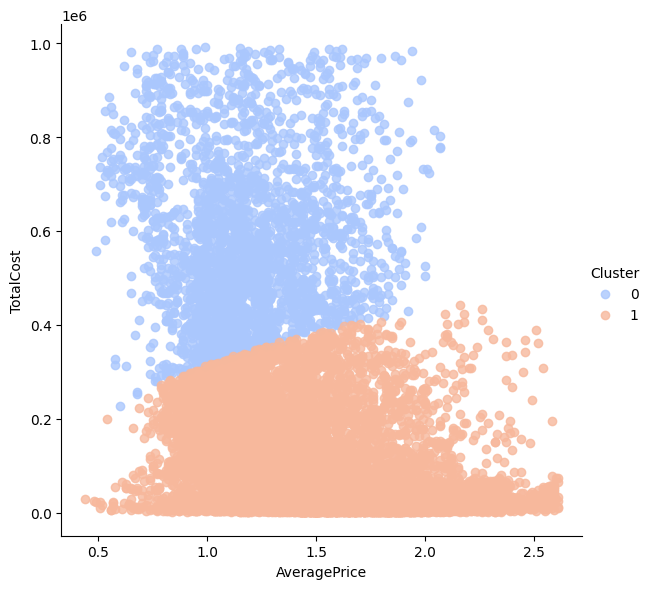

In [52]:
sns.lmplot(x='AveragePrice',y='TotalCost',data=data, hue='Cluster',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)

In [ ]:
Вывод: Проведя кластеризацию на две группы с помощью k средних, и сравнивая графики разбиения по кластерам и по типам авокадо, можно заметить сходство.
Метод k средних разбивает точки на группы схожие с группами по типам авокадо. Конечно результат не совпадает на 100%, так как данные очень плотные
и в некоторых местах равномерные. Но это не мешает пробовать предсказать какого типа авокадо, исходя из разбиения данных на два кластера.